In [86]:
#conda create --name py3 python=3.7
#conda activate py3
#conda config --set allow_conda_downgrades true
#conda install conda=4.6.14
#conda config --set channel_priority false
#conda install -c conda-forge pygrib
#conda install -c anaconda basemap  --- Basemap is deprecated in favor of the Cartopy
#conda install -c conda-forge cartopy

%matplotlib inline 
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pygrib
import numpy as np

In [104]:
grbs = pygrib.open('nam_218_20201014_0000_000.grb2')

In [105]:
for grb in grbs[:]:
    print(grb)

1:Pressure reduced to MSL:Pa (instant):lambert:meanSea:level 0:fcst time 0 hrs:from 202010140000
2:Derived radar reflectivity:dB (instant):lambert:hybrid:level 1:fcst time 0 hrs:from 202010140000
3:Maximum/Composite radar reflectivity:dB (instant):lambert:unknown:level 0 considered as a single layer:fcst time 0 hrs:from 202010140000
4:Visibility:m (instant):lambert:surface:level 0:fcst time 0 hrs:from 202010140000
5:Visibility:m (instant):lambert:cloudTop:level 0:fcst time 0 hrs:from 202010140000
6:Blackadar mixing length scale:m (instant):lambert:hybrid:level 1:fcst time 0 hrs:from 202010140000
7:Geopotential Height:gpm (instant):lambert:unknown:level 0:fcst time 0 hrs:from 202010140000
8:U component of wind:m s**-1 (instant):lambert:unknown:level 0:fcst time 0 hrs:from 202010140000
9:V component of wind:m s**-1 (instant):lambert:unknown:level 0:fcst time 0 hrs:from 202010140000
10:Ventilation Rate:m**2 s**-1 (instant):lambert:unknown:level 0:fcst time 0 hrs:from 202010140000
11:Wind 

311:Vertical velocity:Pa s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202010140000
312:Geometric vertical velocity:m s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202010140000
313:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202010140000
314:V component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202010140000
315:Turbulent kinetic energy:J kg**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202010140000
316:Haines Index:Numeric (instant):lambert:surface:level 0:fcst time 0 hrs:from 202010140000
317:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 97500 Pa:fcst time 0 hrs:from 202010140000
318:Temperature:K (instant):lambert:isobaricInhPa:level 97500 Pa:fcst time 0 hrs:from 202010140000
319:Relative humidity:% (instant):lambert:isobaricInhPa:level 97500 Pa:fcst time 0 hrs:from 202010140000
320:Vertical vel

In [106]:
print(grb.keys())

['globalDomain', 'GRIBEditionNumber', 'tablesVersionLatest', 'grib2divider', 'is_efas', 'angleSubdivisions', 'missingValue', 'ieeeFloats', 'isHindcast', 'section0Length', 'identifier', 'discipline', 'editionNumber', 'totalLength', 'sectionNumber', 'section1Length', 'numberOfSection', 'centre', 'centreDescription', 'subCentre', 'tablesVersion', 'masterDir', 'localTablesVersion', 'significanceOfReferenceTime', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dataDate', 'julianDay', 'dataTime', 'productionStatusOfProcessedData', 'typeOfProcessedData', 'md5Section1', 'selectStepTemplateInterval', 'selectStepTemplateInstant', 'stepType', 'is_chemical', 'is_chemical_distfn', 'is_aerosol', 'is_aerosol_optical', 'setCalendarId', 'deleteCalendarId', 'is_uerra', 'sectionNumber', 'grib2LocalSectionPresent', 'deleteLocalDefinition', 'sectionNumber', 'gridDescriptionSectionPresent', 'section3Length', 'numberOfSection', 'sourceOfGridDefinition', 'numberOfDataPoints', 'numberOfOctectsForNumberOfP

2020-10-14 00:00:00
[[299.68546 299.68546 299.67548 ... 302.46545 302.43546 302.40546]
 [299.69547 299.70547 299.69547 ... 302.43546 302.41547 302.39545]
 [299.72546 299.71545 299.70547 ... 302.39545 302.38547 302.37546]
 ...
 [282.67548 282.63547 282.57547 ... 278.18546 278.23547 278.28546]
 [282.63547 282.58545 282.52545 ... 278.17548 278.24545 278.30545]
 [282.56546 282.52545 282.48547 ... 278.19547 278.26547 278.31546]]
266.45547 312.94547


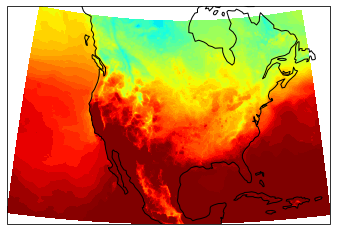

In [118]:
grbs.rewind() # rewind the iterator
from datetime import datetime
date_valid = datetime(2020,10,13,0)
t2mens = []
for grb in grbs:
    if grb.parameterName == 'Temperature' and grb.level == 2:
        print(grb.validDate)
        print(grb.values)
        t2mens.append(grb.values)
    
t2mens = np.array(t2mens)
print(t2mens[0].min(), t2mens[0].max())
lats, lons = grb.latlons() 

x,y=lons,lats
ax = plt.axes(projection=ccrs.LambertConformal())
#plt.contourf(lons, lats, t2mens[0], 60,transform=ccrs.PlateCarree())
plt.contourf(x,y,t2mens[0],np.linspace(250,300,50),transform=ccrs.PlateCarree(),cmap=plt.cm.jet,extend='both')
ax.coastlines()
plt.show()